In [1]:
#Exploration of behavioral data

In [37]:
#Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats
from scipy.stats import ttest_rel
import pingouin as pg

In [3]:
#Import csv dataset with ratings
df = pd.read_csv('rs_project_vividness_ratings.csv')
df.head()

,CODE,RUN,ESTIMATE,SUB01,SUB03,SUB05,SUB06,SUB07,SUB09,SUB10,...,SUB17,SUB18,SUB20,SUB21,SUB22,SUB23,SUB24,SUB25,SUB27,SUB28
0,1,1,1,3,4,4,4,3,4,4,...,4,4,1,4,3,4,4,4,4,4
1,1,1,2,3,4,4,3,4,4,4,...,4,4,1,4,3,4,4,4,4,4
2,2,1,3,3,4,4,4,4,3,4,...,3,2,0,4,3,3,3,3,4,4
3,2,1,4,2,3,4,3,4,4,4,...,4,3,1,4,3,4,3,4,4,4
4,3,1,5,4,4,3,2,4,2,4,...,3,3,1,4,3,4,3,0,4,1


In [4]:
#Create new dataset with count of responses for each level of vividness separately for each subject
#Columns will be levels of vividness rating
columns = ['1', '2', '3', '4', 'MISS']
index = df.columns
df_vividness = pd.DataFrame(index=index, columns=columns)
df_vividness = df_vividness.fillna(0)
df_vividness = df_vividness.drop(['CODE', 'RUN', 'ESTIMATE'])
df_vividness

,1,2,3,4,MISS
SUB01,0,0,0,0,0
SUB03,0,0,0,0,0
SUB05,0,0,0,0,0
SUB06,0,0,0,0,0
SUB07,0,0,0,0,0
SUB09,0,0,0,0,0
SUB10,0,0,0,0,0
SUB11,0,0,0,0,0
SUB12,0,0,0,0,0
SUB13,0,0,0,0,0


In [5]:
#Fill rows with count of vividness across runs
for i in df_vividness.index:
    count = df[i].value_counts()
    try:
        df_vividness['1'][i] = count[1]
    except KeyError:
        df_vividness['1'][i] = 0
    try:
        df_vividness['2'][i] = count[2]
    except KeyError:
        df_vividness['2'][i] = 0
    try:
        df_vividness['3'][i] = count[3]
    except KeyError:
        df_vividness['3'][i] = 0
    try:
        df_vividness['4'][i] = count[4]
    except KeyError:
        df_vividness['4'][i] = 0
    try:
        df_vividness['MISS'][i] = count[0]
    except KeyError:
        df_vividness['MISS'][i] = 0
    
df_vividness

,1,2,3,4,MISS
SUB01,4,23,60,56,1
SUB03,1,11,53,77,2
SUB05,3,10,49,80,2
SUB06,21,53,61,7,2
SUB07,2,19,56,66,1
SUB09,16,54,58,16,0
SUB10,7,15,70,51,1
SUB11,10,15,34,79,6
SUB12,0,26,87,31,0
SUB13,2,37,86,19,0


Text(0.5, 1.0, 'Vividness ratings at group level')

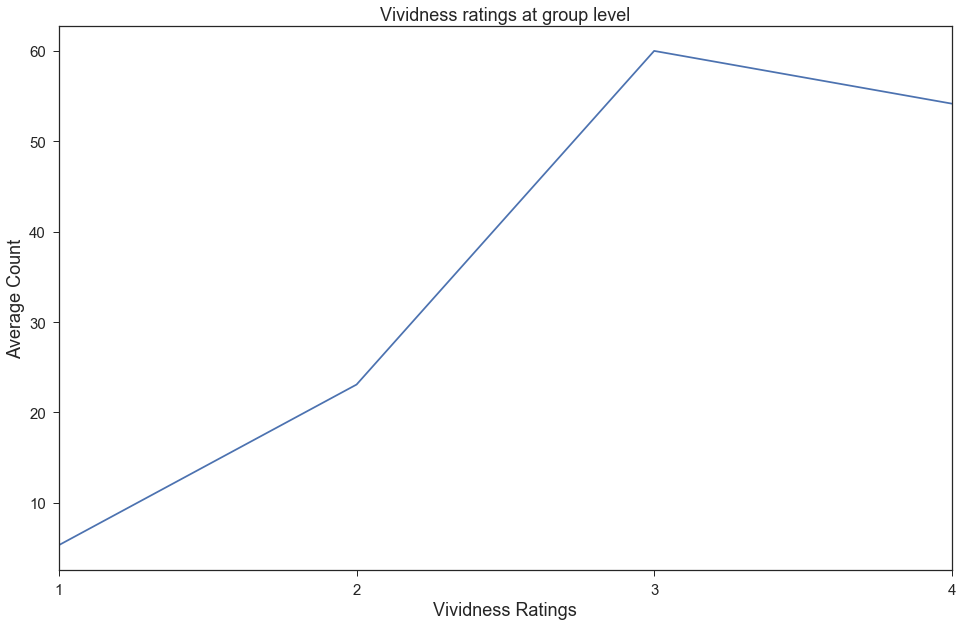

In [6]:
#Plot average vividness (group level)
average_vividness = [df_vividness[i].mean() for i in df_vividness.columns]
del average_vividness[4]
plt.style.use('seaborn-notebook')
plt.figure(figsize=(16,10))
plt.xlabel('Vividness Ratings', fontsize = 18)
plt.ylabel('Average Count', fontsize = 18)
plt.xlim(1,4)
plt.plot(np.append(np.roll(average_vividness,1), average_vividness[3]))
plt.xticks(np.arange(1,5,1))
plt.tick_params(labelsize=15)
plt.title('Vividness ratings at group level', fontsize=18)

Text(0.5, 1.0, 'Miss across subjects')

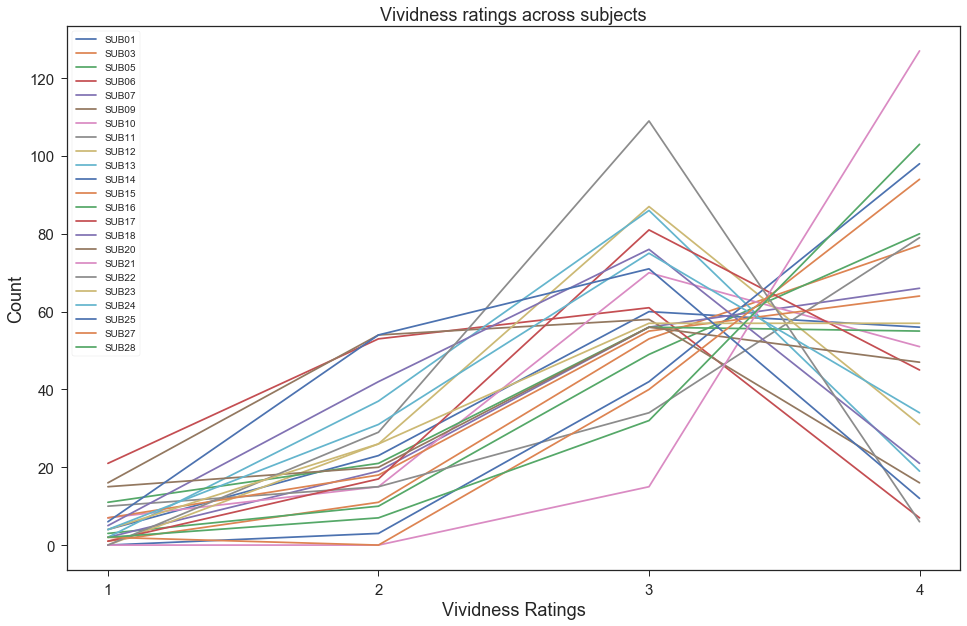

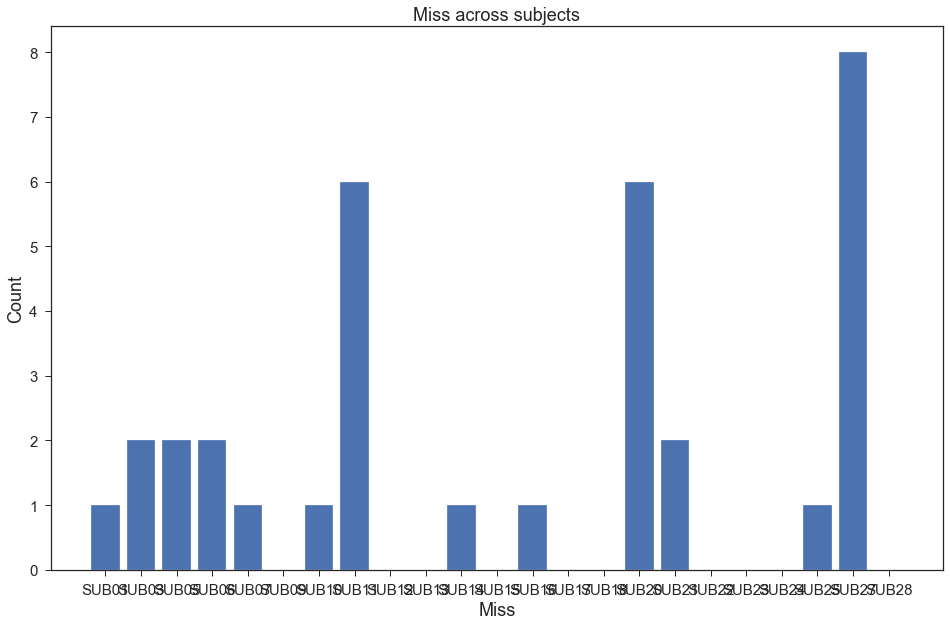

In [7]:
#Plot vividness score 
df_plot = df_vividness.T
df_plot = df_plot.drop('MISS')
plt.style.use('seaborn-notebook')
plt.figure(figsize=(16,10))
plt.plot(df_plot)
plt.xlabel('Vividness Ratings', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.tick_params(labelsize=15)
plt.legend(df_plot.columns)
plt.title('Vividness ratings across subjects', fontsize=18)
plt.figure(figsize=(16,10))
plt.bar(df_vividness.index, df_vividness['MISS'])
plt.xlabel('Miss', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.tick_params(labelsize=15)
plt.title('Miss across subjects', fontsize=18)

In [8]:
#Find miss responses: understand in which runs we have 0s
miss_runs=[]
for sub in df_vividness.index:
    miss_runs = [df['RUN'].iloc[i] for i in range(len(df[sub])) if df[sub].iloc[i] == 0]
    miss_runs = np.unique(miss_runs)
    if miss_runs.any():
        print('%s has missed rating in runs %s' % (sub, ' '.join(str(miss_runs))))
    miss_runs = []

SUB01 has missed rating in runs [ 1 ]
SUB03 has missed rating in runs [ 5   9 ]
SUB05 has missed rating in runs [ 3   8 ]
SUB06 has missed rating in runs [ 1   3 ]
SUB07 has missed rating in runs [ 9 ]
SUB10 has missed rating in runs [ 1 ]
SUB11 has missed rating in runs [ 1   2   3 ]
SUB14 has missed rating in runs [ 1 ]
SUB16 has missed rating in runs [ 1 ]
SUB20 has missed rating in runs [ 1   2   4   8 ]
SUB21 has missed rating in runs [ 1   6 ]
SUB25 has missed rating in runs [ 1 ]
SUB27 has missed rating in runs [ 1   5   7   8   9 ]


In [9]:
#Find whether there are empty EVs file (if so, there are no ratings for that EV)
pathToFile = r'C:\Users\flavio.ragni\Google Drive Unitn\ERC_perceptual_awareness_resting_state_project\Results\fMRI\log\parametricModulation'
dir = os.listdir(pathToFile)
for file in dir:
    if os.stat(os.path.join(pathToFile, file)).st_size == 0:
        print('%s is empty' % file)

FileNotFoundError: [WinError 3] Impossibile trovare il percorso specificato: 'C:\\Users\\flavio.ragni\\Google Drive Unitn\\ERC_perceptual_awareness_resting_state_project\\Results\\fMRI\\log\\parametricModulation'

In [10]:
#Data exploration: find average rating based on stimType
df_stim = df
average_stim_ratingspersub = df_stim.groupby('CODE').mean()
average_stim_ratings = average_stim_ratingspersub
average_stim_ratings = average_stim_ratings.drop(['RUN','ESTIMATE'],1) 
average_stim_ratings['MEAN'] = average_stim_ratings.mean(axis=1)
average_stim_ratings_std = [average_stim_ratings.iloc[[0,1]].mean(axis=0).std(),average_stim_ratings.iloc[[2,3]].mean(axis=0).std(),average_stim_ratings.iloc[[4,5]].mean(axis=0).std(),average_stim_ratings.iloc[[6,7]].mean(axis=0).std()]

Text(0.5, 1.0, 'Average vividness rating categories x familiarity')

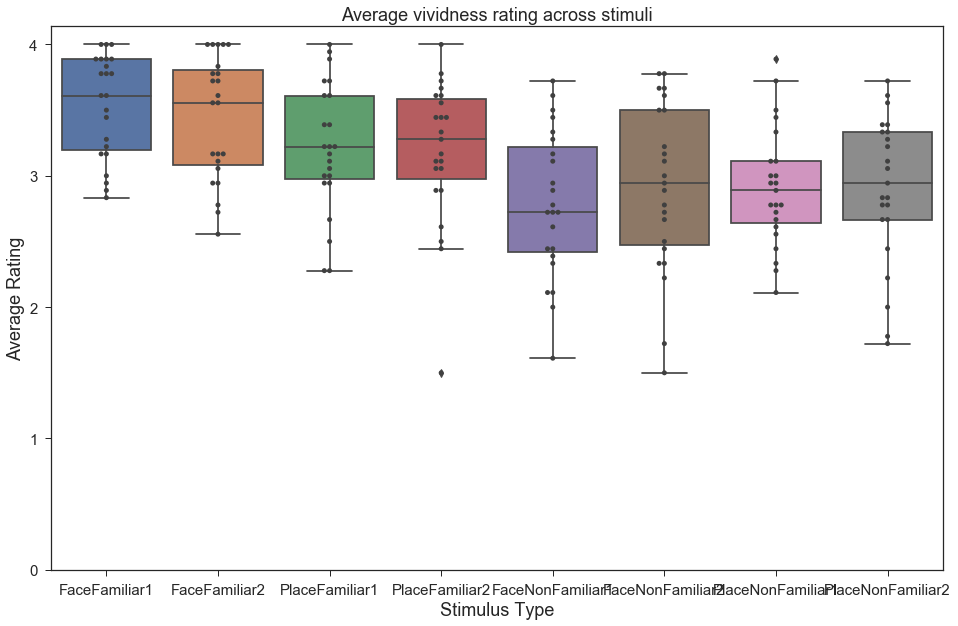

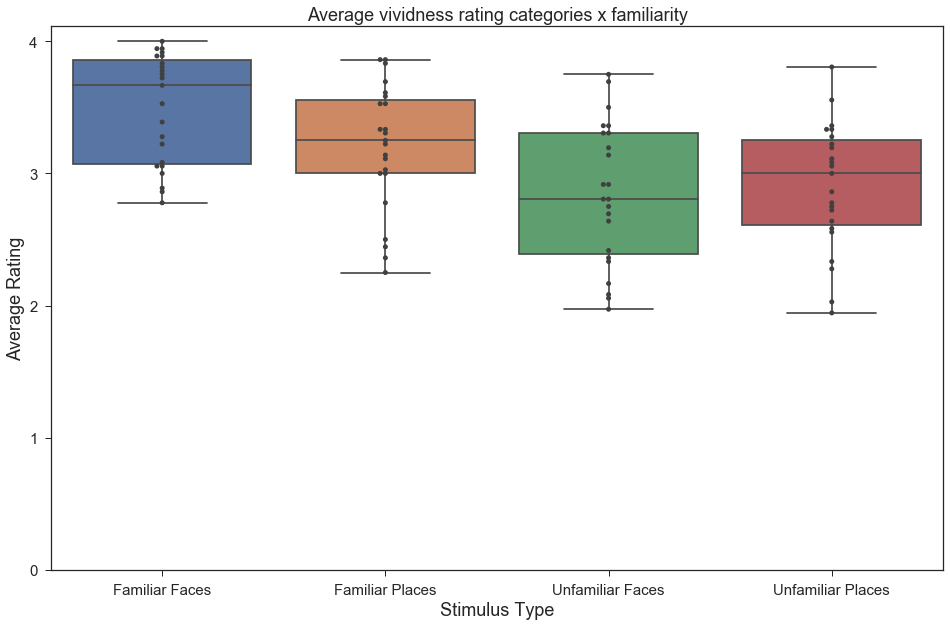

In [11]:
#Plot average vividness
boxplotTrials = average_stim_ratings.T
boxplotTrials.columns = range(1,(boxplotTrials.shape[1]+1))
boxplotTrials.drop('MEAN', inplace=True)
boxplotTrials.columns = ['FaceFamiliar1', 'FaceFamiliar2', 'PlaceFamiliar1', 'PlaceFamiliar2', 'FaceNonFamiliar1', 'FaceNonFamiliar2', 'PlaceNonFamiliar1', 'PlaceNonFamiliar2']
plt.figure(figsize=(16,10))
plt.style.use('seaborn-notebook')
ax = sns.boxplot(data=boxplotTrials)
ax = sns.swarmplot(data=boxplotTrials, color=".25")
#sns.barplot(['FAMILIAR FACES', 'FAMILIAR PLACES', 'NON FAMILIAR FACES', 'NON FAMILIAR PLACES'],[average_stim_ratings['MEAN'].iloc[[0,1]].mean(axis=0), average_stim_ratings['MEAN'].iloc[[2,3]].mean(axis=0),average_stim_ratings['MEAN'].iloc[[4,5]].mean(axis=0), average_stim_ratings['MEAN'].iloc[[6,7]].mean(axis=0)])
#plt.errorbar(['FAMILIAR FACES', 'FAMILIAR PLACES', 'NON FAMILIAR FACES', 'NON FAMILIAR PLACES'],[average_stim_ratings['MEAN'].iloc[[0,1]].mean(axis=0), average_stim_ratings['MEAN'].iloc[[2,3]].mean(axis=0),average_stim_ratings['MEAN'].iloc[[4,5]].mean(axis=0), average_stim_ratings['MEAN'].iloc[[6,7]].mean(axis=0)],yerr = average_stim_ratings_std, barsabove = True, ecolor = 'black',ls='none')
plt.yticks(np.arange(0,5,1))
plt.xlabel('Stimulus Type', fontsize = 18)
plt.ylabel('Average Rating', fontsize = 18)
plt.tick_params(labelsize=15)
plt.title('Average vividness rating across stimuli', fontsize=18)

#Do it for categories/familiarity
boxplotCategories = average_stim_ratings.T
boxplotCategories.columns = range(boxplotCategories.shape[1])
boxplotCategories['Familiar Faces'] = boxplotCategories[[0,1]].mean(axis=1)
boxplotCategories['Familiar Places'] = boxplotCategories[[2,3]].mean(axis=1)
boxplotCategories['Unfamiliar Faces'] = boxplotCategories[[4,5]].mean(axis=1)
boxplotCategories['Unfamiliar Places'] = boxplotCategories[[6,7]].mean(axis=1)
boxplotCategories = boxplotCategories[['Familiar Faces','Familiar Places','Unfamiliar Faces','Unfamiliar Places']]
boxplotCategories.drop('MEAN', inplace=True)
plt.figure(figsize=(16,10))
plt.style.use('seaborn-notebook')
ax = sns.boxplot(data=boxplotCategories)
ax = sns.swarmplot(data=boxplotCategories, color=".25")
#sns.barplot(['FAMILIAR FACES', 'FAMILIAR PLACES', 'NON FAMILIAR FACES', 'NON FAMILIAR PLACES'],[average_stim_ratings['MEAN'].iloc[[0,1]].mean(axis=0), average_stim_ratings['MEAN'].iloc[[2,3]].mean(axis=0),average_stim_ratings['MEAN'].iloc[[4,5]].mean(axis=0), average_stim_ratings['MEAN'].iloc[[6,7]].mean(axis=0)])
#plt.errorbar(['FAMILIAR FACES', 'FAMILIAR PLACES', 'NON FAMILIAR FACES', 'NON FAMILIAR PLACES'],[average_stim_ratings['MEAN'].iloc[[0,1]].mean(axis=0), average_stim_ratings['MEAN'].iloc[[2,3]].mean(axis=0),average_stim_ratings['MEAN'].iloc[[4,5]].mean(axis=0), average_stim_ratings['MEAN'].iloc[[6,7]].mean(axis=0)],yerr = average_stim_ratings_std, barsabove = True, ecolor = 'black',ls='none')
plt.yticks(np.arange(0,5,1))
plt.xlabel('Stimulus Type', fontsize = 18)
plt.ylabel('Average Rating', fontsize = 18)
plt.tick_params(labelsize=15)
plt.title('Average vividness rating categories x familiarity', fontsize=18)

In [38]:
#Compute rANOVA with pingouin
#rAnova = pg.rm_anova(dv = None, data = boxplotCategories, subject = boxplotCategories.index, detailed = True)

Ttest_relResult(statistic=3.368206561505587, pvalue=0.0027738115967752756)

In [40]:
#Compute paired samples ttest between categories
for i in range(len(boxplotCategories.columns) - 1):
    if i == 0:
        psttest = ttest_rel(boxplotCategories.iloc[:,i], boxplotCategories.iloc[:,i+1])
        print(('{} vs {}: t = {:.3f}, p = {:.3f}').format(boxplotCategories.iloc[:,i].name, boxplotCategories.iloc[:,i+1].name, psttest[0], psttest[1]))
        psttest = ttest_rel(boxplotCategories.iloc[:,i], boxplotCategories.iloc[:,i+2])
        print(('{} vs {}: t = {:.3f}, p = {:.3f}').format(boxplotCategories.iloc[:,i].name, boxplotCategories.iloc[:,i+2].name, psttest[0], psttest[1]))
        psttest = ttest_rel(boxplotCategories.iloc[:,i], boxplotCategories.iloc[:,i+3])
        print(('{} vs {}: t = {:.3f}, p = {:.3f}').format(boxplotCategories.iloc[:,i].name, boxplotCategories.iloc[:,i+3].name, psttest[0], psttest[1]))
    if i == 1:
        psttest = ttest_rel(boxplotCategories.iloc[:,i], boxplotCategories.iloc[:,i+1])
        print(('{} vs {}: t = {:.3f}, p = {:.3f}').format(boxplotCategories.iloc[:,i].name, boxplotCategories.iloc[:,i+1].name, psttest[0], psttest[1]))
        psttest = ttest_rel(boxplotCategories.iloc[:,i], boxplotCategories.iloc[:,i+2])
        print(('{} vs {}: t = {:.3f}, p = {:.3f}').format(boxplotCategories.iloc[:,i].name, boxplotCategories.iloc[:,i+2].name, psttest[0], psttest[1]))
    if i == 2:
        psttest = ttest_rel(boxplotCategories.iloc[:,i], boxplotCategories.iloc[:,i+1])
        print(('{} vs {}: t = {:.3f}, p = {:.3f}').format(boxplotCategories.iloc[:,i].name, boxplotCategories.iloc[:,i+1].name, psttest[0], psttest[1]))

Familiar Faces vs Familiar Places: t = 3.368, p = 0.003
Familiar Faces vs Unfamiliar Faces: t = 5.644, p = 0.000
Familiar Faces vs Unfamiliar Places: t = 5.547, p = 0.000
Familiar Places vs Unfamiliar Faces: t = 3.133, p = 0.005
Familiar Places vs Unfamiliar Places: t = 2.771, p = 0.011
Unfamiliar Faces vs Unfamiliar Places: t = -0.542, p = 0.593


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


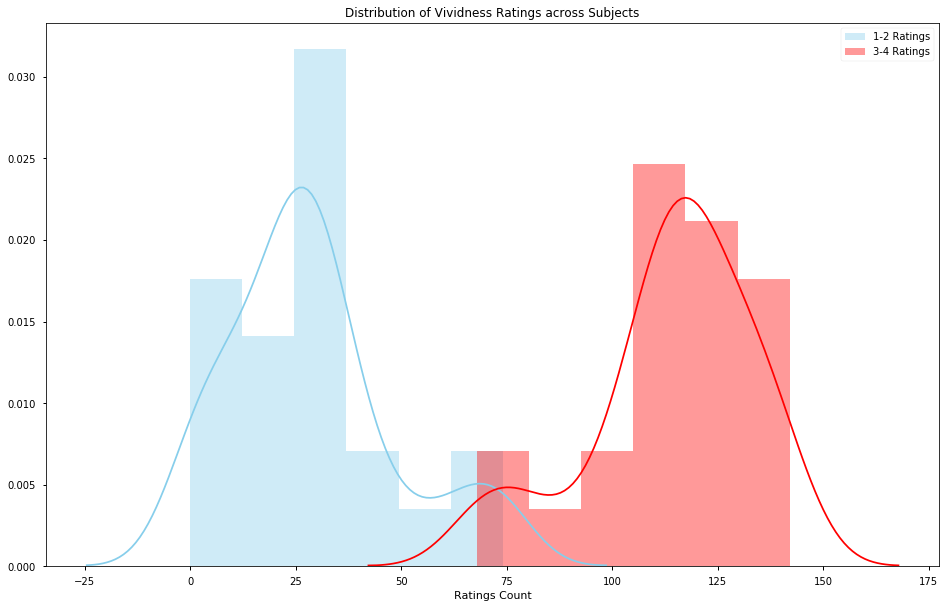

In [12]:
df_distribution = df_vividness
df_distribution['1-2'] = df_distribution['1'] + df_distribution['2']
df_distribution['3-4'] = df_distribution['3'] + df_distribution['4']
#Plot distributions
plt.figure(figsize=(16,10))
ax = sns.distplot(df_distribution['1-2'], color='skyblue', label='1-2 Ratings')
ax = sns.distplot(df_distribution['3-4'], color='red', label='3-4 Ratings')
ax.set_xlabel('Ratings Count')
ax.set_title('Distribution of Vividness Ratings across Subjects')
ax.legend()

In [13]:
#Divide ratings between faces and houses
faces_ratings = df[(df['CODE'] == 1) | (df['CODE'] == 2) | (df['CODE'] == 5) | (df['CODE'] == 6)]
places_ratings = df[(df['CODE'] == 3) | (df['CODE'] == 4) | (df['CODE'] == 7) | (df['CODE'] == 8)]
faces_ratings = faces_ratings.copy()
places_ratings = places_ratings.copy()
faces_ratings.drop(['CODE', 'RUN', 'ESTIMATE'], axis=1, inplace=True)
places_ratings.drop(['CODE', 'RUN', 'ESTIMATE'], axis=1, inplace=True)
#Count occurrences of each rating across subjects
faces_ratings_count = pd.DataFrame(columns=['1','2','3','4','MISS'], index=df_vividness.index)
places_ratings_count = pd.DataFrame(columns=['1','2','3','4','MISS'], index=df_vividness.index)
for i in faces_ratings.columns:
    count = faces_ratings[i].value_counts()
    try:
        faces_ratings_count['1'][i] = count[1]
    except KeyError:
        faces_ratings_count['1'][i] = 0
    try:
        faces_ratings_count['2'][i] = count[2]
    except KeyError:
        faces_ratings_count['2'][i] = 0
    try:
        faces_ratings_count['3'][i] = count[3]
    except KeyError:
        faces_ratings_count['3'][i] = 0
    try:
        faces_ratings_count['4'][i] = count[4]
    except KeyError:
        faces_ratings_count['4'][i] = 0
    try:
        faces_ratings_count['MISS'][i] = count[0]
    except KeyError:
        faces_ratings_count['MISS'][i] = 0

for i in places_ratings.columns:
    count = places_ratings[i].value_counts()
    try:
        places_ratings_count['1'][i] = count[1]
    except KeyError:
        places_ratings_count['1'][i] = 0
    try:
        places_ratings_count['2'][i] = count[2]
    except KeyError:
        places_ratings_count['2'][i] = 0
    try:
        places_ratings_count['3'][i] = count[3]
    except KeyError:
        places_ratings_count['3'][i] = 0
    try:
        places_ratings_count['4'][i] = count[4]
    except KeyError:
        places_ratings_count['4'][i] = 0
    try:
        places_ratings_count['MISS'][i] = count[0]
    except KeyError:
        places_ratings_count['MISS'][i] = 0

#Create count for ratings 1-2 and 3-4
faces_ratings_count['1-2'] = faces_ratings_count['1'] + faces_ratings_count['2']
faces_ratings_count['3-4'] = faces_ratings_count['3'] + faces_ratings_count['4']
places_ratings_count['1-2'] = places_ratings_count['1'] + places_ratings_count['2']
places_ratings_count['3-4'] = places_ratings_count['3'] + places_ratings_count['4']
faces_ratings_count

,1,2,3,4,MISS,1-2,3-4
SUB01,3,12,34,22,1,15,56
SUB03,0,6,29,36,1,6,65
SUB05,0,2,25,45,0,2,70
SUB06,5,26,34,6,1,31,40
SUB07,0,2,29,41,0,2,70
SUB09,8,29,25,10,0,37,35
SUB10,2,7,38,24,1,9,62
SUB11,9,12,9,39,3,21,48
SUB12,0,10,47,15,0,10,62
SUB13,1,15,46,10,0,16,56


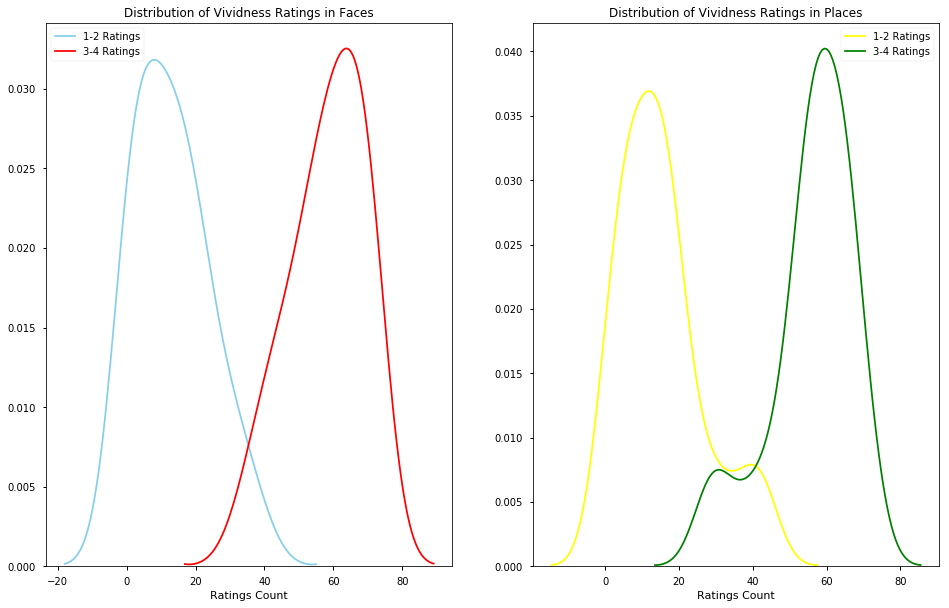

In [14]:
#Plot distributions
plt.figure(figsize=(16,10))
plt.subplot(1,2,1)
ax = sns.kdeplot(faces_ratings_count['1-2'], color='skyblue', label='1-2 Ratings')
ax = sns.kdeplot(faces_ratings_count['3-4'], color='red', label='3-4 Ratings')
ax.set_xlabel('Ratings Count')
ax.set_title('Distribution of Vividness Ratings in Faces')
ax.legend()
plt.subplot(1,2,2)
ax = sns.kdeplot(places_ratings_count['1-2'], color='yellow', label='1-2 Ratings')
ax = sns.kdeplot(places_ratings_count['3-4'], color='green', label='3-4 Ratings')
ax.set_xlabel('Ratings Count')
ax.set_title('Distribution of Vividness Ratings in Places')
ax.legend()

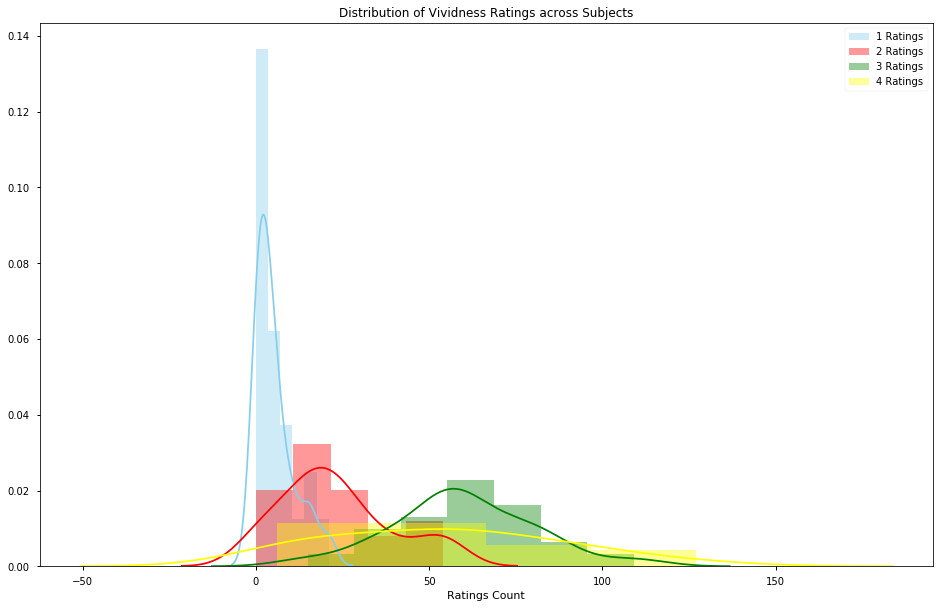

In [15]:
#Plot distributions all toghether
plt.figure(figsize=(16,10))
ax = sns.distplot(df_distribution['1'], color='skyblue', label='1 Ratings')
ax = sns.distplot(df_distribution['2'], color='red', label='2 Ratings')
ax = sns.distplot(df_distribution['3'], color='green', label='3 Ratings')
ax = sns.distplot(df_distribution['4'], color='yellow', label='4 Ratings')
ax.set_xlabel('Ratings Count')
ax.set_title('Distribution of Vividness Ratings across Subjects')
ax.legend()

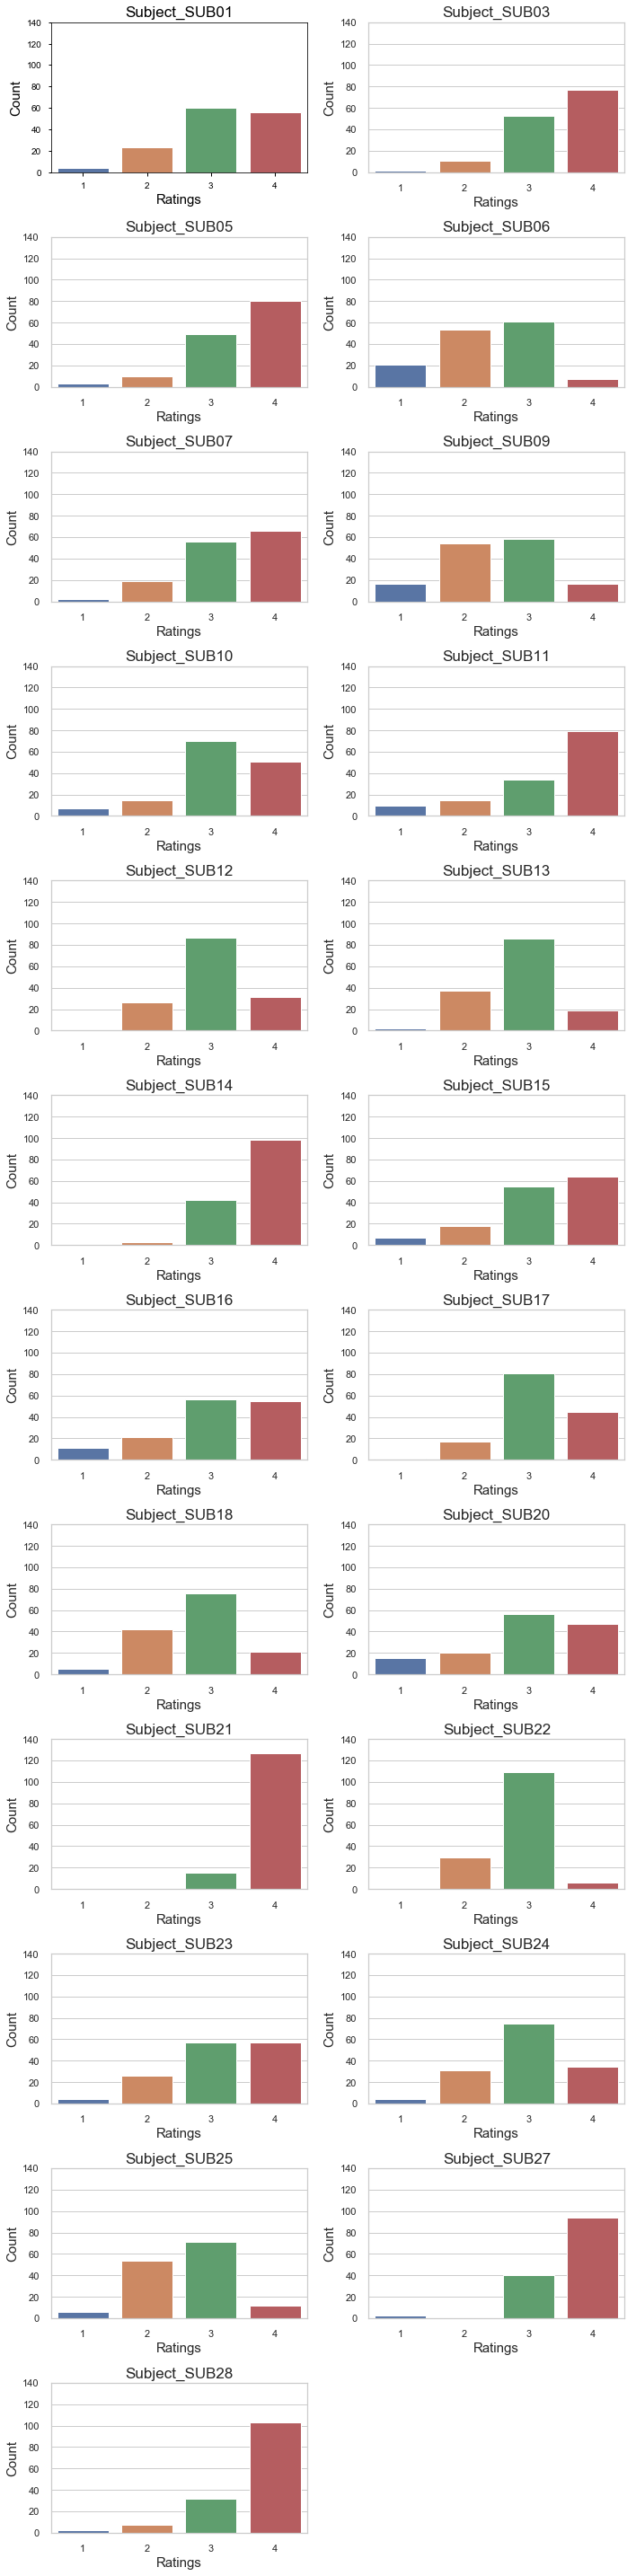

In [16]:
#Plot distribution of ratings for each participant
plt.figure(figsize=(10,40))
for i in range(len(df_distribution)):
    plt.subplot((len(df_distribution)//2)+1, 2, i+1)
    sns.set(style='whitegrid')
    ax = sns.barplot(x = list(df_distribution)[0:4], y = df_distribution.iloc[i,0:4])
    ax.set_xlabel('Ratings', fontsize=15)
    ax.set_ylabel('Count', fontsize=15)
    ax.set_ylim(0,140)
    ax.set_title('Subject_' + list(df_distribution.index)[i], fontsize = 17)
    plt.tight_layout()
    plt.savefig('individual_ratings_distribution.png')

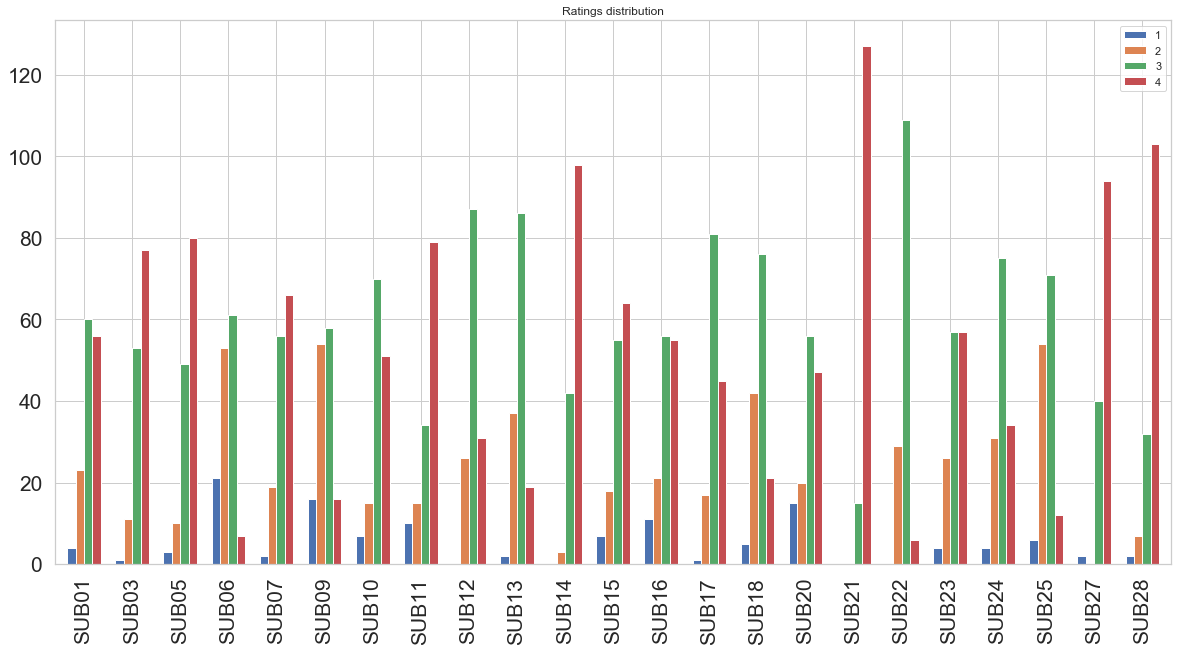

In [17]:
#Plot ratings distribution across subjects
df_distribution[['1','2','3','4']].plot(kind='bar', figsize=(20,10), width=0.7, fontsize=21, title='Ratings distribution')

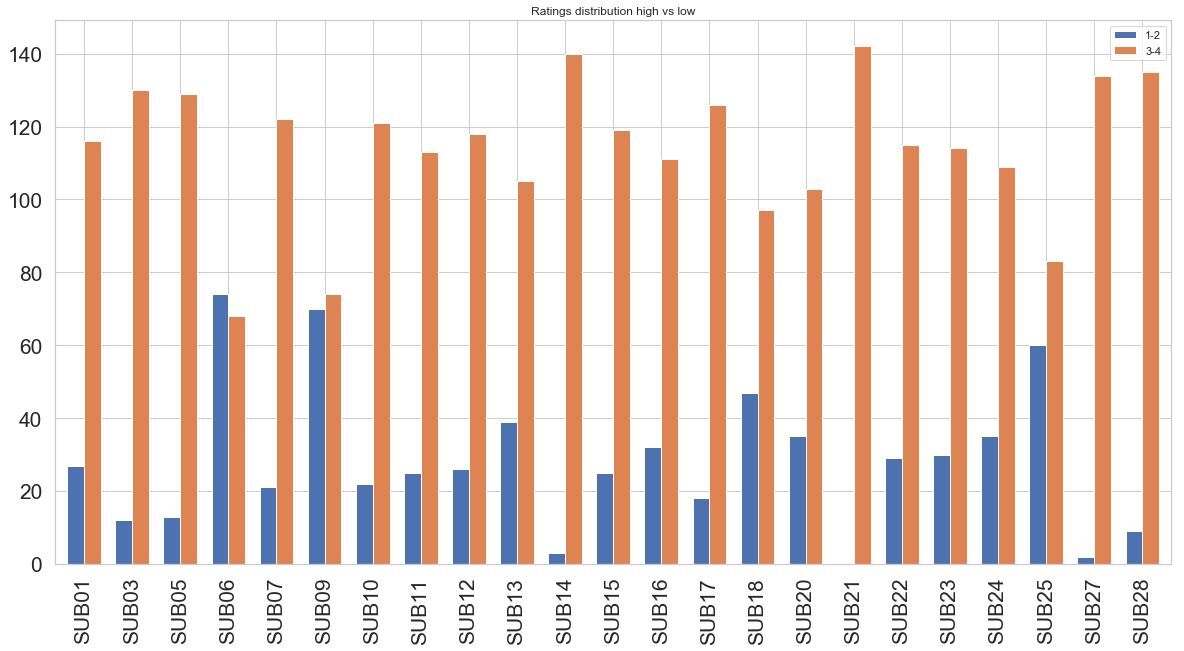

In [18]:
#Plot ratings distribution divided by high and low vividness
df_distribution[['1-2','3-4']].plot(kind='bar', figsize=(20,10), width=0.7, fontsize=21, title='Ratings distribution high vs low')